<div style="padding:10px;
            color:#FFFFFF;
            margin:10px auto;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(255, 255, 255);
            background-color:#000000;
            overflow:hidden;
            font-weight:400;
            text-align:center;">
  <b> ✅ Step 1: Import Libraries</b>
</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

<div style="padding:10px;
            color:#FFFFFF;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(255, 255, 255);
            background-color:#000000;
            overflow:hidden;
            font-weight:400;
            text-align:center;">
    <b> 📊 Step 2: Load Dataset</b>
</div>

In [3]:

file_path = r"heart_disease_risk_dataset_earlymed.csv"
df = pd.read_csv(file_path)
df.head()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,48.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,46.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,66.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,60.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0


<div style="padding:10px;
            color:#FFFFFF;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(255, 255, 255);
            background-color:#000000;
            overflow:hidden;
            font-weight:400;
            text-align:center;">
    <b> 🔍 Step 3: Explore the Data</b>
</div>


In [3]:
print(f"Number of rows =", df.shape[0])

Number of rows = 70000


In [4]:
print(f"Number of columns =", df.shape[1])

Number of columns = 19


In [5]:
print("\nData Info:")
df.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chest_Pain           70000 non-null  float64
 1   Shortness_of_Breath  70000 non-null  float64
 2   Fatigue              70000 non-null  float64
 3   Palpitations         70000 non-null  float64
 4   Dizziness            70000 non-null  float64
 5   Swelling             70000 non-null  float64
 6   Pain_Arms_Jaw_Back   70000 non-null  float64
 7   Cold_Sweats_Nausea   70000 non-null  float64
 8   High_BP              70000 non-null  float64
 9   High_Cholesterol     70000 non-null  float64
 10  Diabetes             70000 non-null  float64
 11  Smoking              70000 non-null  float64
 12  Obesity              70000 non-null  float64
 13  Sedentary_Lifestyle  70000 non-null  float64
 14  Family_History       70000 non-null  float64
 15  Chronic_Stress       700

In [6]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Chest_Pain             0
Shortness_of_Breath    0
Fatigue                0
Palpitations           0
Dizziness              0
Swelling               0
Pain_Arms_Jaw_Back     0
Cold_Sweats_Nausea     0
High_BP                0
High_Cholesterol       0
Diabetes               0
Smoking                0
Obesity                0
Sedentary_Lifestyle    0
Family_History         0
Chronic_Stress         0
Gender                 0
Age                    0
Heart_Risk             0
dtype: int64


In [7]:
print("\nClass Distribution:")
print(df['Heart_Risk'].value_counts())


Class Distribution:
Heart_Risk
0.0    35000
1.0    35000
Name: count, dtype: int64


In [8]:
print("Data Describing : ")
df.describe().T

Data Describing : 


,count,mean,std,min,25%,50%,75%,max
Chest_Pain,70000.0,0.499229,0.500003,0.0,0.0,0.0,1.0,1.0
Shortness_of_Breath,70000.0,0.500586,0.500003,0.0,0.0,1.0,1.0,1.0
Fatigue,70000.0,0.498571,0.500002,0.0,0.0,0.0,1.0,1.0
Palpitations,70000.0,0.498729,0.500002,0.0,0.0,0.0,1.0,1.0
Dizziness,70000.0,0.501414,0.500002,0.0,0.0,1.0,1.0,1.0
Swelling,70000.0,0.498929,0.500002,0.0,0.0,0.0,1.0,1.0
Pain_Arms_Jaw_Back,70000.0,0.501500,0.500001,0.0,0.0,1.0,1.0,1.0
Cold_Sweats_Nausea,70000.0,0.502457,0.499998,0.0,0.0,1.0,1.0,1.0
High_BP,70000.0,0.497429,0.499997,0.0,0.0,0.0,1.0,1.0
High_Cholesterol,70000.0,0.499214,0.500003,0.0,0.0,0.0,1.0,1.0


<div style="padding:10px;
            color:#FFFFFF;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(255, 255, 255);
            background-color:#000000;
            overflow:hidden;
            font-weight:400;
            text-align:center;">
    <b> 📈 Step 4: Data Visualization</b>
</div>


In [5]:
binary_features = df.columns[df.nunique() == 2]

summary_table = pd.DataFrame({
    'Feature': binary_features,
    'Count_0': [df[col].value_counts().get(0, 0) for col in binary_features],
    'Count_1': [df[col].value_counts().get(1, 0) for col in binary_features],
    'Percentage_1': [df[col].mean() * 100 for col in binary_features]
})

summary_table.set_index('Feature', inplace=True)
summary_table.sort_values(by='Percentage_1', ascending=False)

,Count_0,Count_1,Percentage_1
Feature,,,
Gender,31575,38425,54.892857
Sedentary_Lifestyle,34752,35248,50.354286
Smoking,34792,35208,50.297143
Cold_Sweats_Nausea,34828,35172,50.245714
Pain_Arms_Jaw_Back,34895,35105,50.150000
Dizziness,34901,35099,50.141429
Diabetes,34955,35045,50.064286
Shortness_of_Breath,34959,35041,50.058571
Heart_Risk,35000,35000,50.000000


C:\Users\Bassel Mostafa\AppData\Local\Temp\ipykernel_15888\1572934677.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')
C:\Users\Bassel Mostafa\AppData\Local\Temp\ipykernel_15888\1572934677.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')
C:\Users\Bassel Mostafa\AppData\Local\Temp\ipykernel_15888\1572934677.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')
C:\Users\Bassel Mostafa\AppData\Local\Temp\ipykernel_15888\1572934677.py:

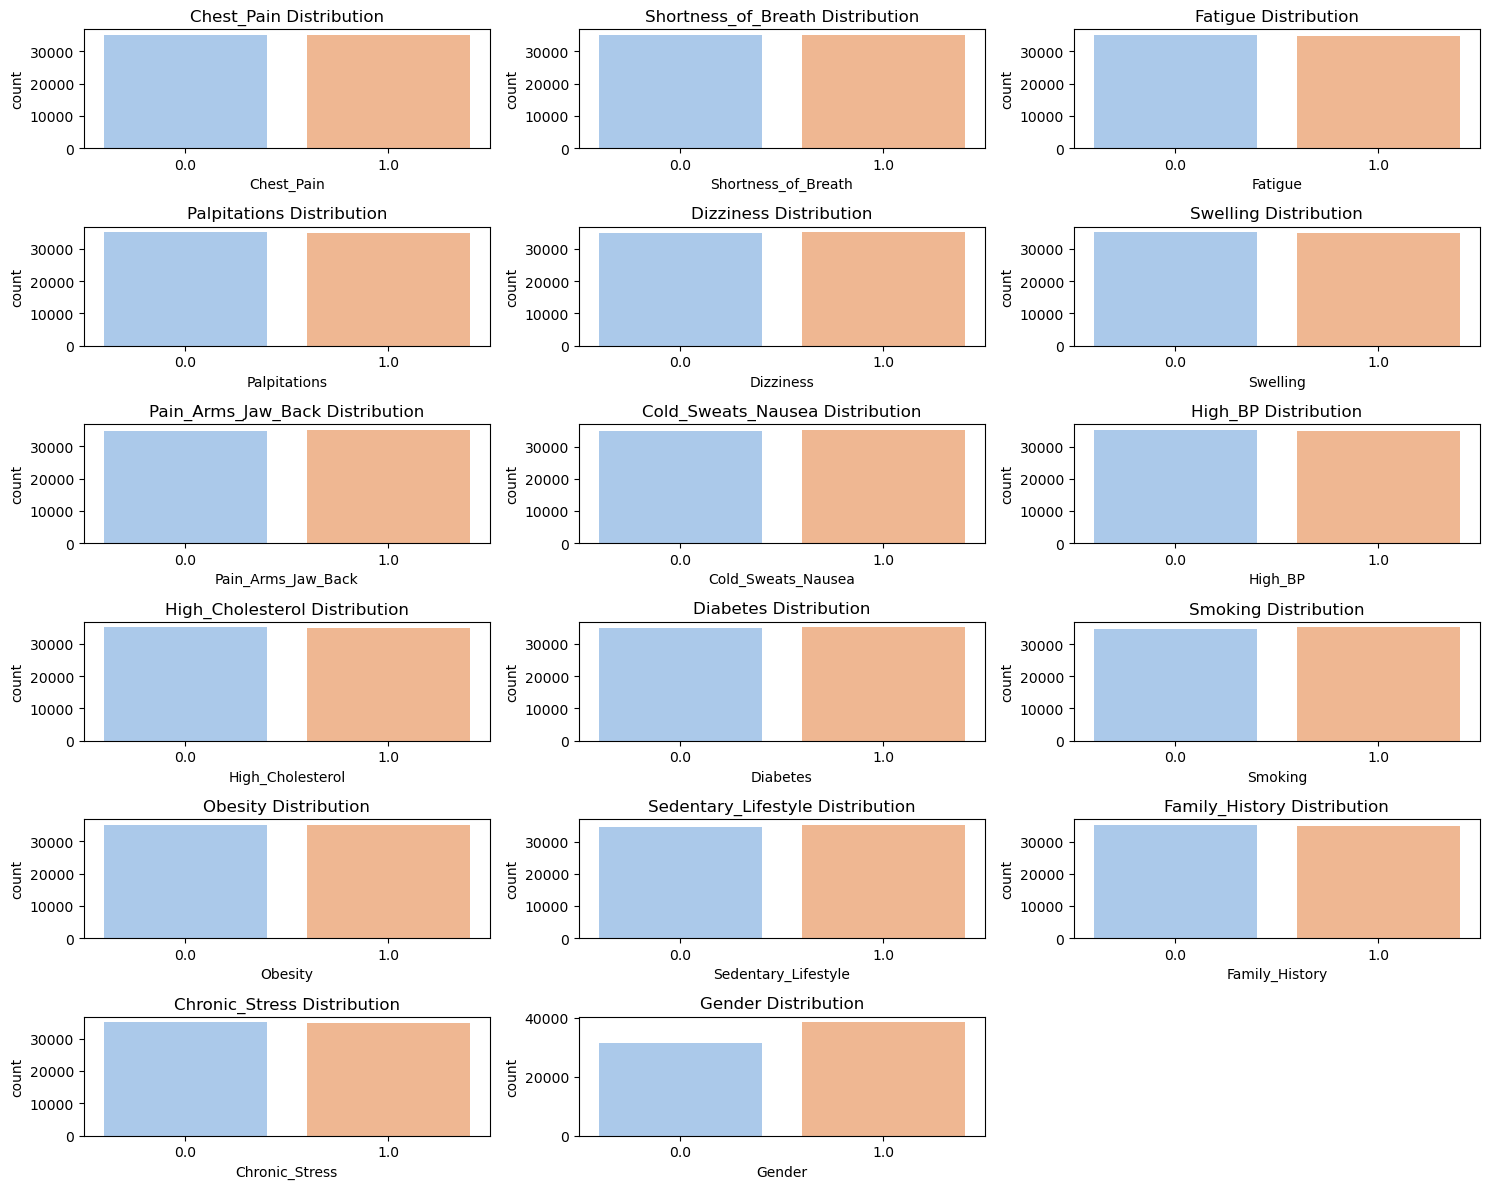

In [6]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(binary_features.drop('Heart_Risk'), 1):
    plt.subplot(6, 3, i)
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(f'{col} Distribution')
    plt.tight_layout()
plt.show()

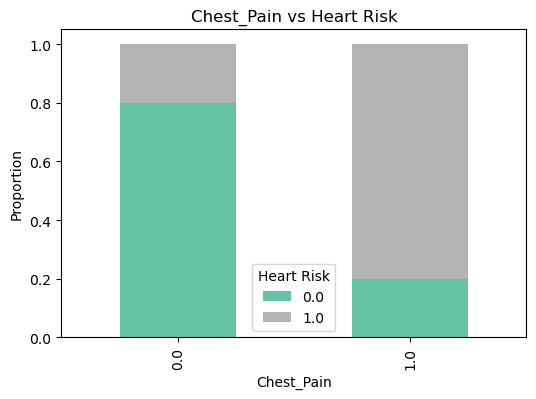

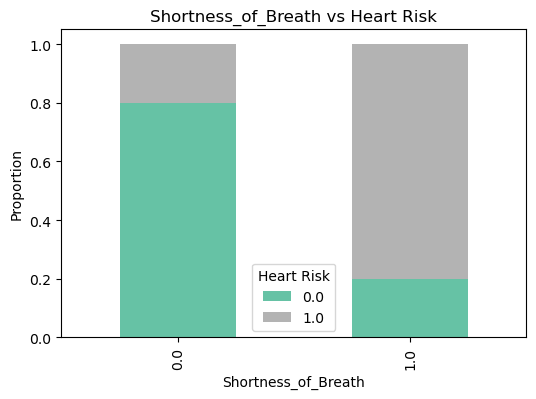

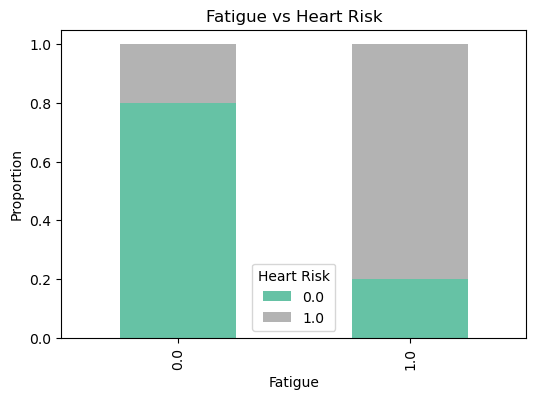

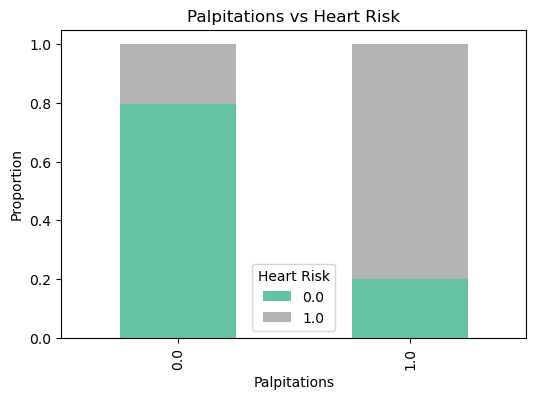

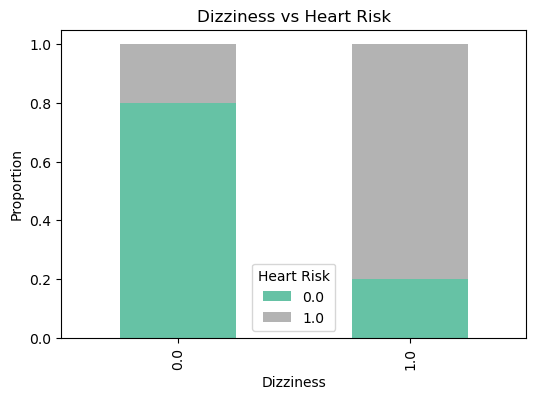

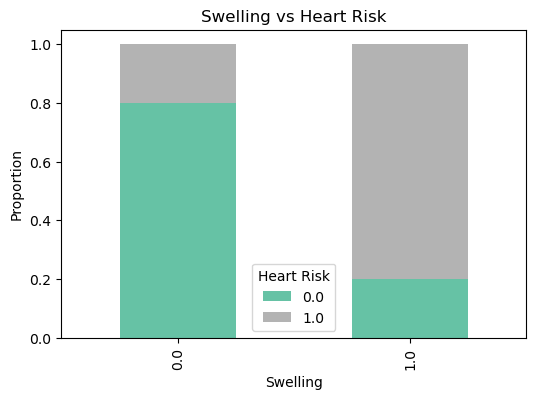

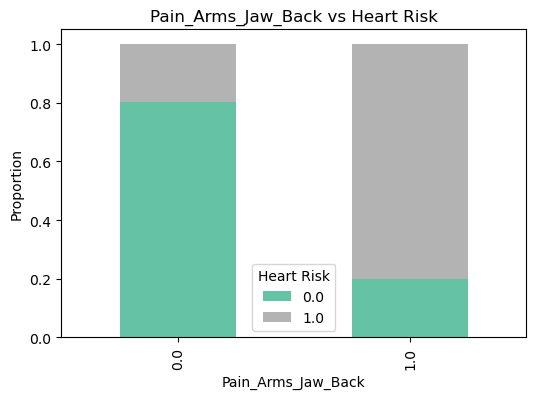

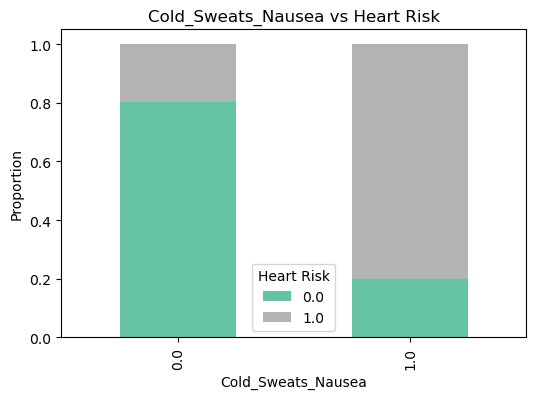

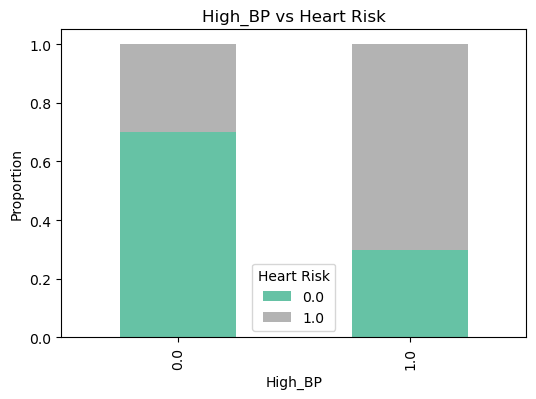

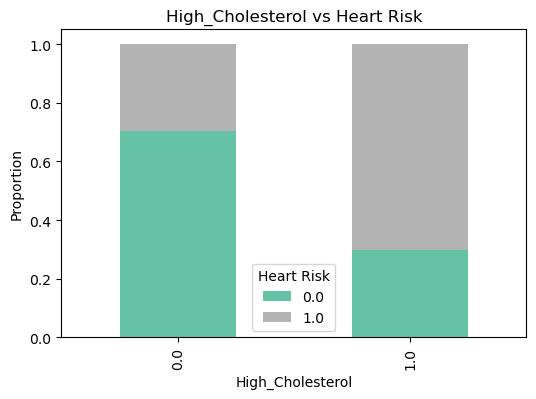

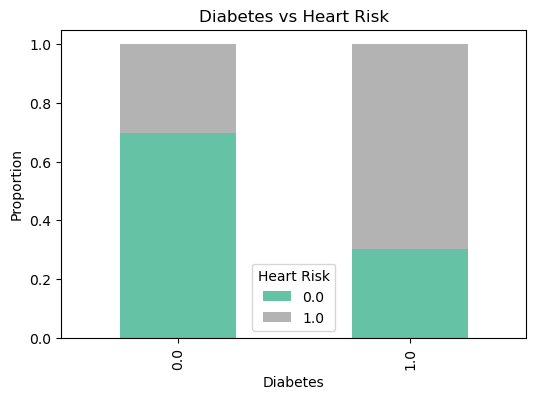

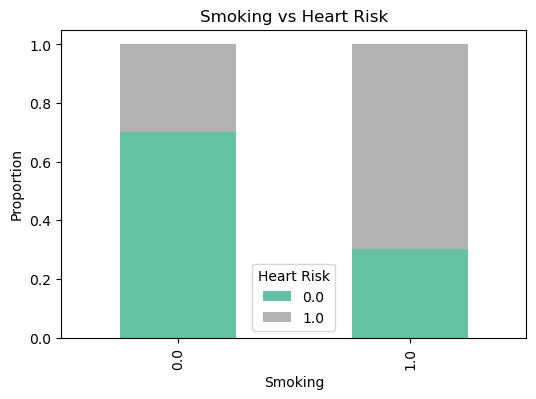

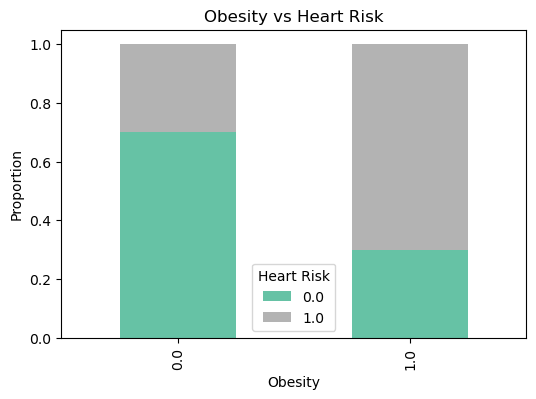

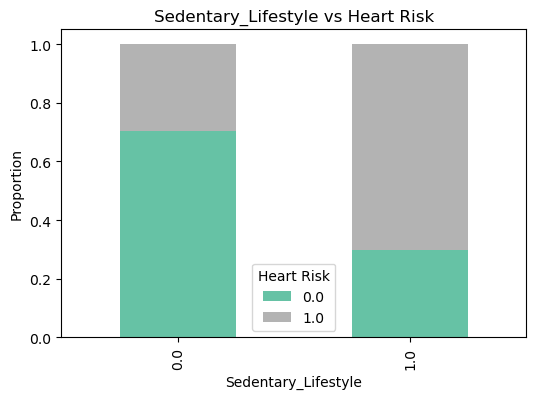

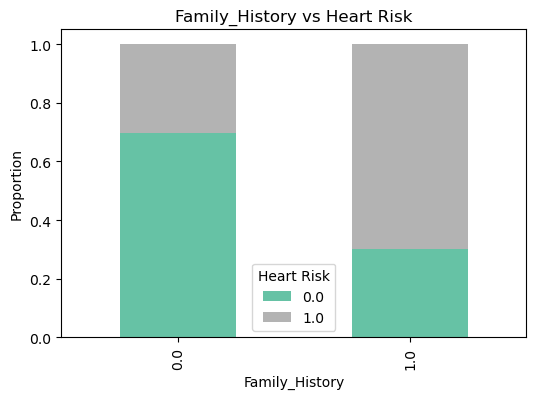

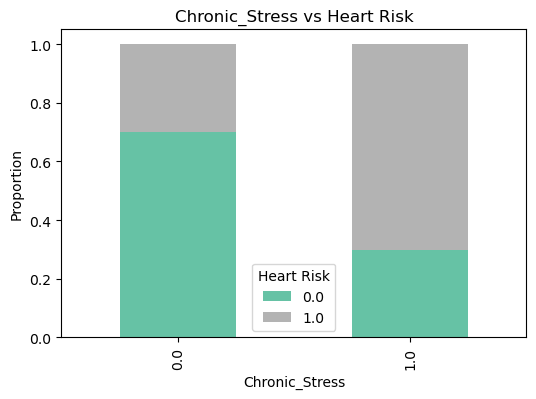

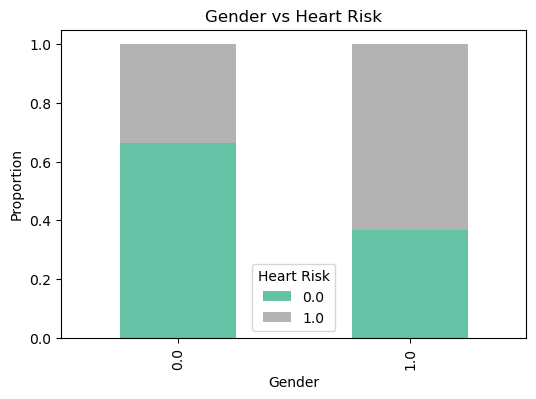

In [11]:
for col in binary_features.drop('Heart_Risk'):
    ct = pd.crosstab(df[col], df['Heart_Risk'], normalize='index')
    ct.plot(kind='bar', stacked=True, colormap='Set2', figsize=(6, 4))
    plt.title(f'{col} vs Heart Risk')
    plt.ylabel('Proportion')
    plt.xlabel(col)
    plt.legend(title='Heart Risk')
    plt.show()

In [12]:
binary_corrs = df[binary_features].corr()['Heart_Risk'].drop('Heart_Risk').sort_values(key=abs, ascending=False)
print(binary_corrs)

Pain_Arms_Jaw_Back     0.601403
Cold_Sweats_Nausea     0.601093
Dizziness              0.600202
Chest_Pain             0.599944
Fatigue                0.599260
Swelling               0.599173
Shortness_of_Breath    0.598772
Palpitations           0.596773
High_Cholesterol       0.405001
Sedentary_Lifestyle    0.404696
High_BP                0.404462
Chronic_Stress         0.401914
Obesity                0.399229
Smoking                0.398007
Family_History         0.397604
Diabetes               0.396086
Gender                 0.293609
Name: Heart_Risk, dtype: float64


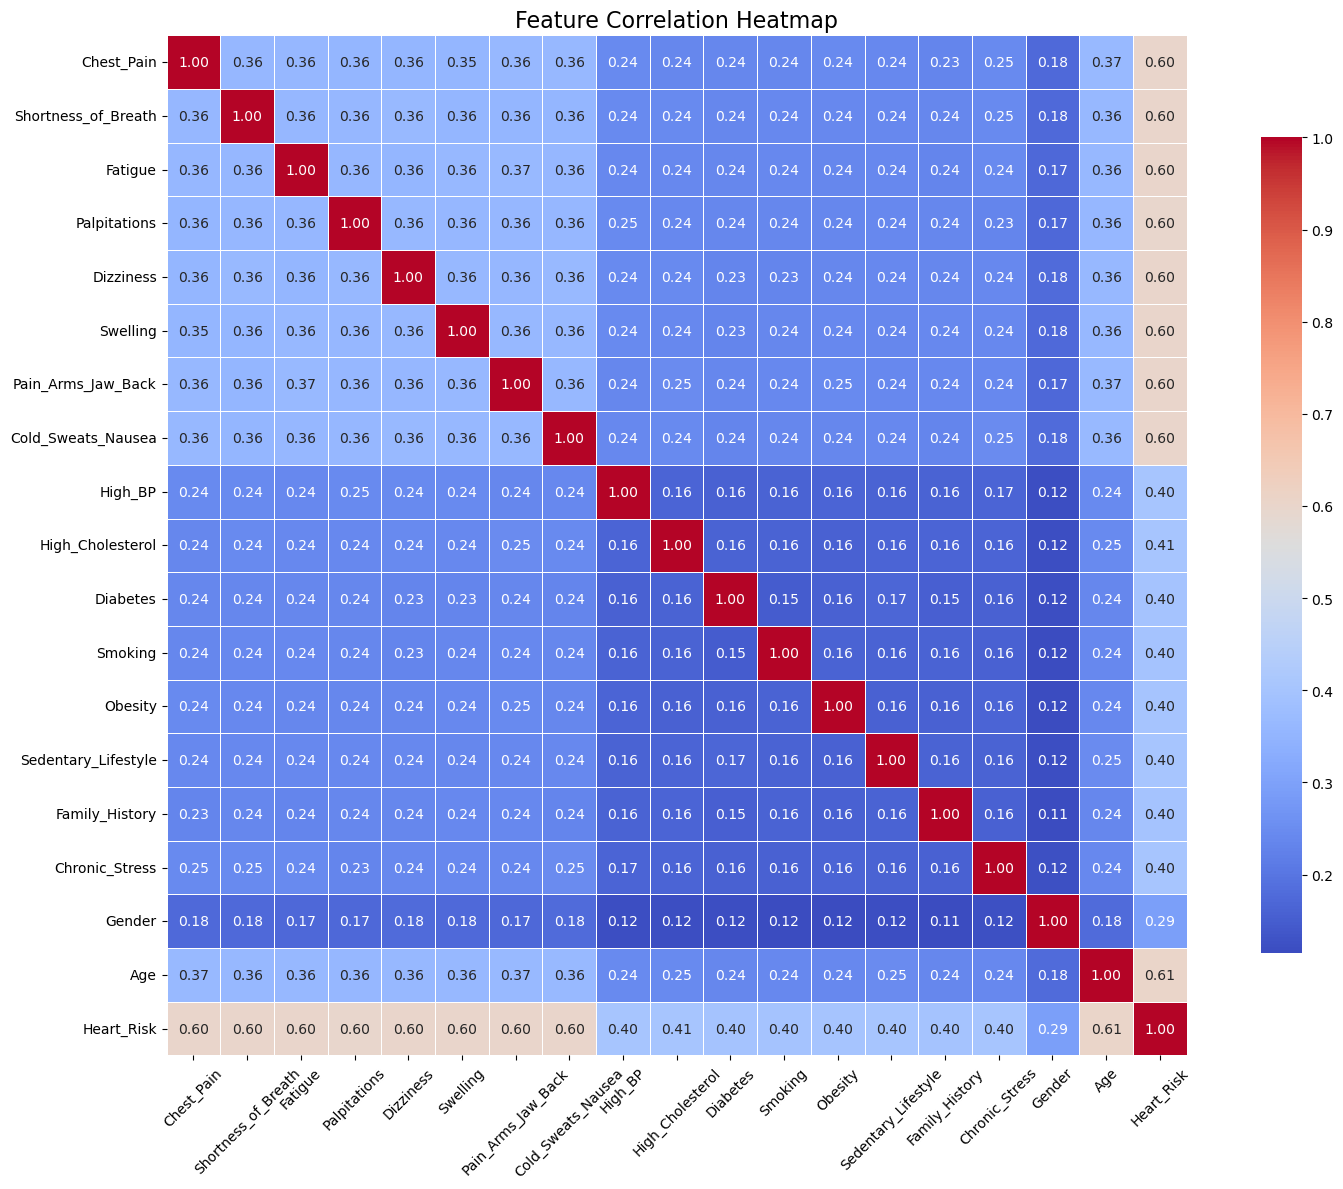

In [13]:
corr_matrix = df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .8}
)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\Bassel Mostafa\AppData\Local\Temp\ipykernel_19240\3314248738.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart_Risk', y='Age', data=df, palette='Set2')


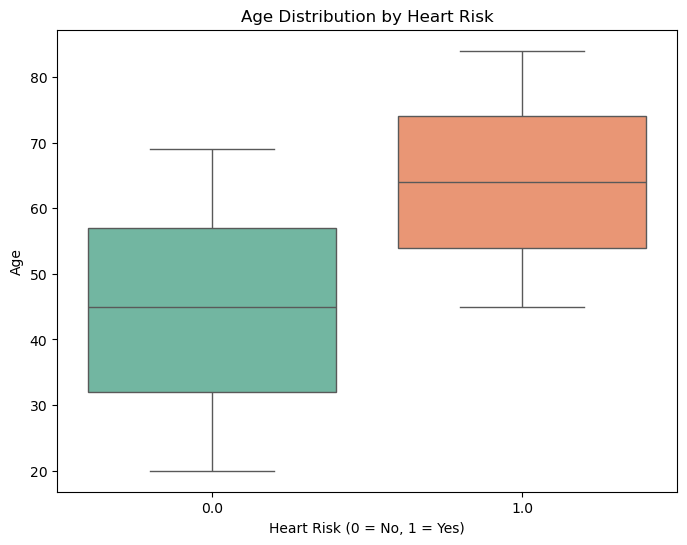

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Heart_Risk', y='Age', data=df, palette='Set2')
plt.title('Age Distribution by Heart Risk')
plt.xlabel('Heart Risk (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

C:\Users\Bassel Mostafa\AppData\Local\Temp\ipykernel_19240\130013173.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Heart Risk')


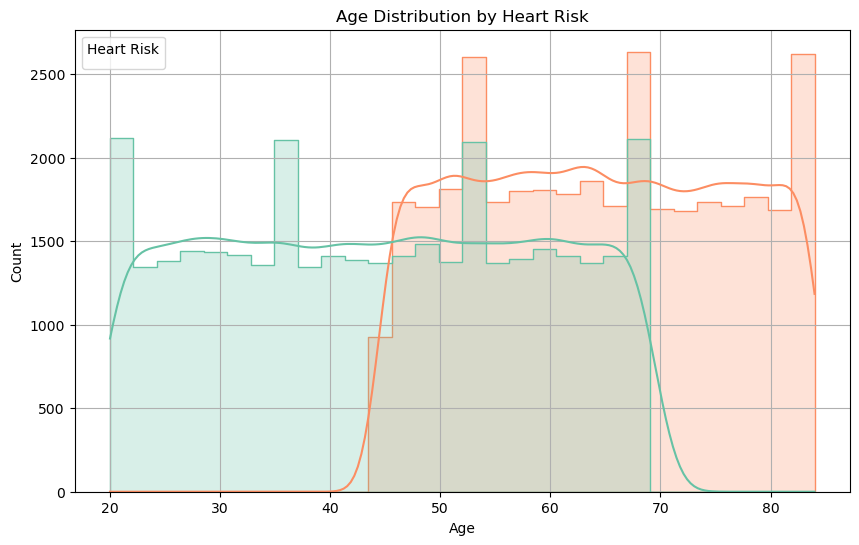

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Heart_Risk', bins=30, kde=True, palette='Set2', element='step')
plt.title('Age Distribution by Heart Risk')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Heart Risk')
plt.grid(True)
plt.show()

<div style="padding:10px;
            color:#FFFFFF;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(255, 255, 255);
            background-color:#000000;
            overflow:hidden;
            font-weight:400;
            text-align:center;">
    <b> 🛠️ Step 5: Preprocessing</b>
</div>


In [16]:
predictors = df.drop('Heart_Risk', axis=1)
target = df['Heart_Risk']

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
df['Heart_Risk'].unique()

array([0., 1.])

In [17]:
X_train.shape

(56000, 18)

In [18]:
X_test.shape

(14000, 18)

In [19]:
Y_train.shape

(56000,)

In [20]:
Y_test.shape

(14000,)

<div style="padding:10px;
            color:#FFFFFF;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(255, 255, 255);
            background-color:#000000;
            overflow:hidden;
            font-weight:400;
            text-align:center;">
    <b>🤖 Step 6: Model Training</b>
</div>

## Logistic Regression

In [21]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred_lr = lr.predict(X_test)
Y_pred_lr.shape

(14000,)

In [22]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 99.13 %


## Naive Bayes

In [23]:
nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

Y_pred_nb.shape

(14000,)

In [24]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 99.09 %


## SVM

In [25]:
sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

Y_pred_svm.shape

(14000,)

In [26]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 99.13 %


## K Nearest Neighbors

In [27]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

Y_pred_knn.shape

(14000,)

In [28]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 99.2 %


## Decision Tree

In [29]:
max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [30]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 98.29 %


## RandomForest Model

In [31]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, Y_train)

Y_pred_rf = rf_model.predict(X_test)

In [32]:
# Calculate accuracy for Random Forest
score_rf = round(accuracy_score(Y_pred_rf, Y_test) * 100, 2)
print("The accuracy score achieved using Random Forest is: " + str(score_rf) + " %")

The accuracy score achieved using Random Forest is: 99.09 %


## Output final score

In [33]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","RandomForest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 99.13 %
The accuracy score achieved using Naive Bayes is: 99.09 %
The accuracy score achieved using Support Vector Machine is: 99.13 %
The accuracy score achieved using K-Nearest Neighbors is: 99.2 %
The accuracy score achieved using Decision Tree is: 98.29 %
The accuracy score achieved using RandomForest is: 99.09 %


C:\Users\Bassel Mostafa\AppData\Local\Temp\ipykernel_19240\2325411542.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=algorithms, y=scores, palette=palette, edgecolor='black', linewidth=2)


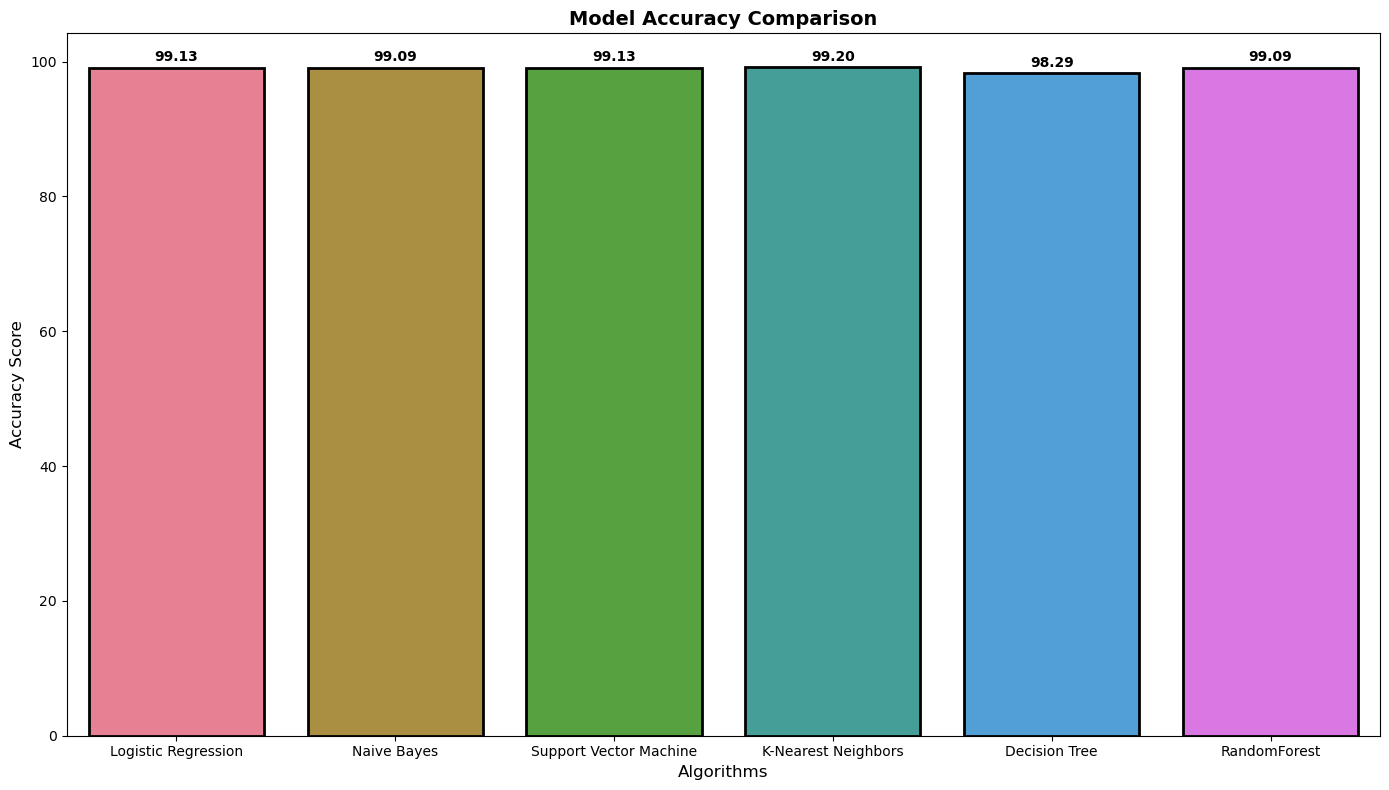

In [ ]:
palette = sns.color_palette("husl", len(algorithms))

plt.figure(figsize=(14, 8))  
barplot = sns.barplot(x=algorithms, y=scores, palette=palette, edgecolor='black', linewidth=2)

for i, score in enumerate(scores):
    plt.text(i, score + 0.5, f"{score:.2f}", ha='center', va='bottom', fontweight='bold')

plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Accuracy Score", fontsize=12)
plt.title("Model Accuracy Comparison", fontsize=14, fontweight='bold')
# plt.xticks(rotation=30, ha='right')  
plt.ylim(0, max(scores) + 5)
plt.tight_layout()
plt.show()


<div style="
    padding: 15px;
    background: linear-gradient(45deg,rgb(28, 129, 7),rgb(56, 255, 63));
    color: Black;
    font-size: 18px;
    font-weight: bold;
    border-radius: 8px;
    box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.3);
    text-align: center;
    width: 700px; /* Limits the width */
    margin: auto; /* Centers the div */
">
    💡 We observe that, we can achieve the best accuracy of 99.22 using KNN
</div>

<div style="padding:10px;
            color:#FFFFFF;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(255, 255, 255);
            background-color:#000000;
            overflow:hidden;
            font-weight:400;
            text-align:center;">
    <b> 📊 Step 7: Evaluation</b>
</div>


=== Logistic Regression ===
Accuracy: 0.9914

Confusion Matrix:
[[6803   58]
 [  63 7076]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      6861
         1.0       0.99      0.99      0.99      7139

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



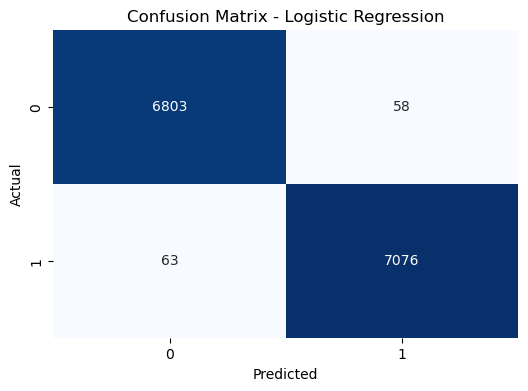


=== RandomForest ===
Accuracy: 0.9909

Confusion Matrix:
[[6805   56]
 [  71 7068]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      6861
         1.0       0.99      0.99      0.99      7139

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



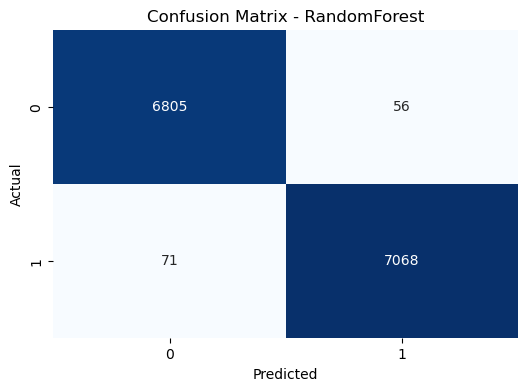


=== SVM ===
Accuracy: 0.9906

Confusion Matrix:
[[6804   57]
 [  74 7065]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      6861
         1.0       0.99      0.99      0.99      7139

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



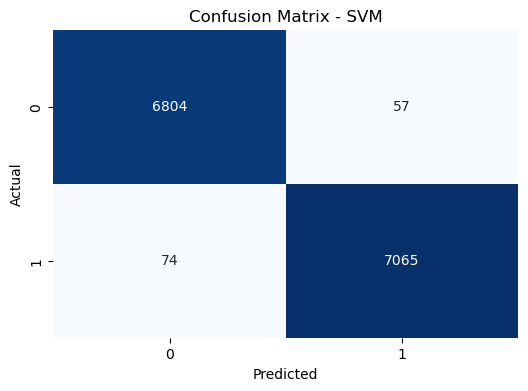


=== KNN ===
Accuracy: 0.9896

Confusion Matrix:
[[6795   66]
 [  79 7060]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      6861
         1.0       0.99      0.99      0.99      7139

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



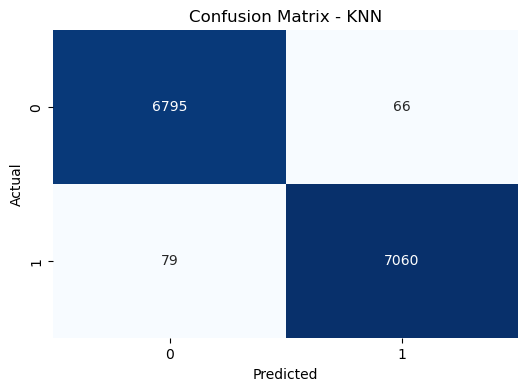


=== Decision Tree ===
Accuracy: 0.9812

Confusion Matrix:
[[6738  123]
 [ 140 6999]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      6861
         1.0       0.98      0.98      0.98      7139

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



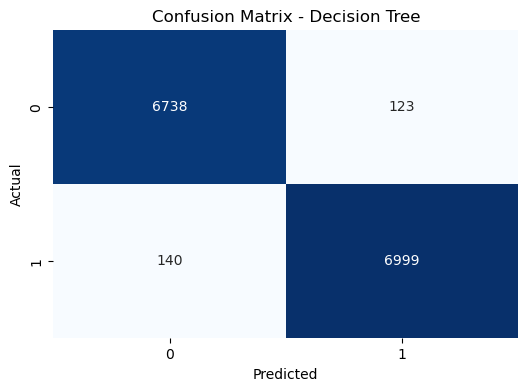


=== Naive Bayes ===
Accuracy: 0.9909

Confusion Matrix:
[[6801   60]
 [  67 7072]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      6861
         1.0       0.99      0.99      0.99      7139

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



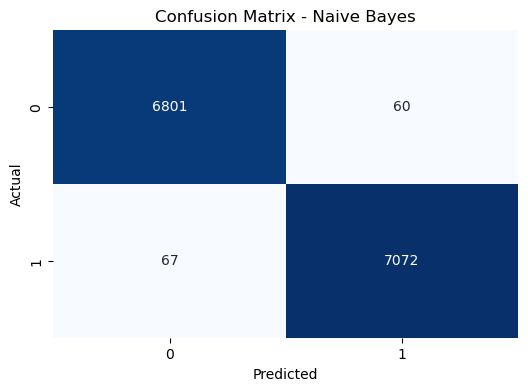

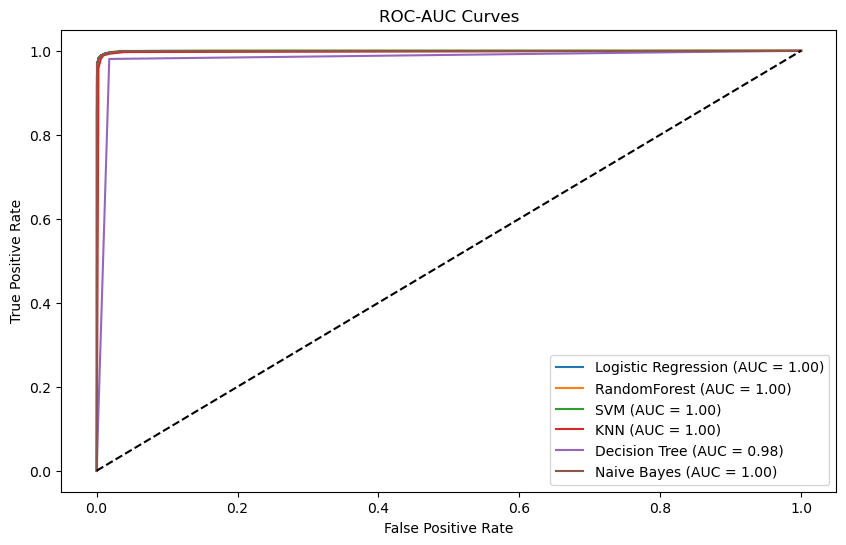

In [35]:
# Scale features (optional, depending on the model)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVM': svm.SVC(random_state=42, probability=True),  # Enable probability for ROC-AUC
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

# Dictionary to store evaluation results
results = {}

# Evaluate each model
for name, model in models.items():
    # Train the model (use scaled data for models that require it)
    if name in ['SVM', 'KNN', 'Logistic Regression']:
        model.fit(X_train_scaled, Y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC-AUC
    else:
        model.fit(X_train, Y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC
    
    # Calculate metrics
    accuracy = accuracy_score(Y_test, y_pred)
    conf_matrix = confusion_matrix(Y_test, y_pred)
    class_report = classification_report(Y_test, y_pred, output_dict=True)
    
    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report,
        'Model': model  # Store model for use in optimization
    }
    
    # Print results
    print(f"\n=== {name} ===")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(classification_report(Y_test, y_pred))
    
    # Visualize Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot ROC-AUC Curves
plt.figure(figsize=(10, 6))
for name in models.keys():
    if name in ['SVM', 'KNN', 'Logistic Regression']:
        y_pred_proba = results[name]['Model'].predict_proba(X_test_scaled)[:, 1]
    else:
        y_pred_proba = results[name]['Model'].predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curves')
plt.legend()
plt.show()


<div style="padding:10px;
            color:#FFFFFF;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(255, 255, 255);
            background-color:#000000;
            overflow:hidden;
            font-weight:400;
            text-align:center;">
    <b> 🔍 Step 8: Model Optmization</b>
</div>

In [36]:
# Step 4: Model Optimization (Random Forest)

# Step 4.1: Prepare Data
features = [
    'Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations', 'Dizziness', 
    'Swelling', 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea', 'High_BP', 
    'High_Cholesterol', 'Diabetes', 'Smoking', 'Obesity', 'Sedentary_Lifestyle', 
    'Family_History', 'Chronic_Stress', 'Gender', 'Age'
]
X = df[features]
y = df['Heart_Risk']

# Apply Scaling to all features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4.2: Define and Optimize Random Forest Model
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],  # تقليل العمق عشان نتحكم في التأثير
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)
optimized_models = {'RandomForest': grid_search.best_estimator_}

# Evaluate the model
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Recall: {grid_search.best_score_:.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, grid_search.predict(X_test)):.4f}")

# Save the scaler for later use
scaler_dict = {'scaler': scaler, 'features': features}

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation Recall: 0.9885
Test Accuracy: 0.9861


<div style="padding:10px;
            color:#FFFFFF;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(255, 255, 255);
            background-color:#000000;
            overflow:hidden;
            font-weight:400;
            text-align:center;">
    <b> 🔍 Step 9: Feature Importance</b>
</div>

C:\Users\Bassel Mostafa\AppData\Local\Temp\ipykernel_19240\2037444586.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette=colors)


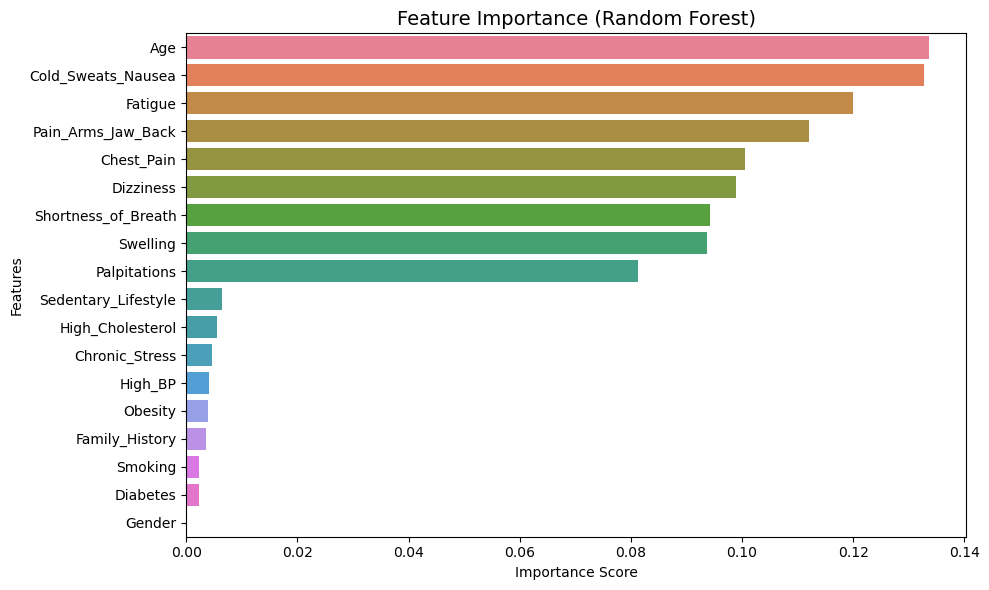


Feature Importance Scores:
                Feature  Importance
17                  Age    0.133575
7    Cold_Sweats_Nausea    0.132744
2               Fatigue    0.119961
6    Pain_Arms_Jaw_Back    0.111962
0            Chest_Pain    0.100498
4             Dizziness    0.098878
1   Shortness_of_Breath    0.094265
5              Swelling    0.093680
3          Palpitations    0.081318
13  Sedentary_Lifestyle    0.006441
9      High_Cholesterol    0.005574
15       Chronic_Stress    0.004714
8               High_BP    0.004081
12              Obesity    0.003946
14       Family_History    0.003644
11              Smoking    0.002393
10             Diabetes    0.002293
16               Gender    0.000033


In [38]:
# Step 7: Feature Importance Visualization (Random Forest)

# Step 7.1: Define the Features (matching the model input from Step 4)
features = [
    'Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations', 'Dizziness', 
    'Swelling', 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea', 'High_BP', 
    'High_Cholesterol', 'Diabetes', 'Smoking', 'Obesity', 'Sedentary_Lifestyle', 
    'Family_History', 'Chronic_Stress', 'Gender', 'Age'
]

# Step 7.2: Get the Trained Model and Extract Feature Importances
model = optimized_models['RandomForest']  # From Step 4
importances = model.feature_importances_

# Step 7.3: Create and Sort DataFrame
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Step 7.4: Plot Feature Importances
plt.figure(figsize=(10, 6))
colors = sns.color_palette("husl", len(feature_df))  # Generate distinct colors
sns.barplot(x='Importance', y='Feature', data=feature_df, palette=colors)
plt.title('Feature Importance (Random Forest)', fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Step 7.5: Display the DataFrame
print("\nFeature Importance Scores:")
print(feature_df)

In [12]:
# Step 6: Patient Prediction


# Step 6.2: Get Input from the Patient
print("Please enter the patient's details (answer 'Yes' or 'No' for most questions, except Age):")
patient_data = {}

for feature in features:
    while True:
        try:
            if feature == 'Age':
                value = float(input(f"{feature} (numeric value, e.g., 45): "))
                patient_data[feature] = value
                break
            else:
                response = input(f"{feature} (Yes/No): ").strip().lower()
                if response in ['yes', 'no']:
                    # Apply manual weights for important features
                    if feature in features:
                        patient_data[feature] = (1 if response == 'yes' else 0) 
                    else:
                        patient_data[feature] = 1 if response == 'yes' else 0
                    break
                else:
                    print("Please answer 'Yes' or 'No'.")
        except ValueError:
            print(f"Invalid input for {feature}. Please try again.")

# Convert patient data to a DataFrame
patient_df = pd.DataFrame([patient_data], columns=features)

# Step 6.3: Apply Scaling to all features (same as training)
patient_df_scaled = scaler_dict['scaler'].transform(patient_df)  # Scale all features

# Step 6.4: Make Prediction Using the Random Forest Model
best_model = optimized_models['RandomForest']  # From Step 4
prediction = best_model.predict(patient_df_scaled)
probability = best_model.predict_proba(patient_df_scaled)[:, 1]

# Step 6.5: Display the Results
print("\n=== Heart Risk Prediction ===")
risk_label = "High Risk" if prediction[0] == 1 else "Low Risk"
print(f"Predicted Heart Risk: {risk_label}")
print(f"Probability of High Risk: {probability[0]:.2%}")

Please enter the patient's details (answer 'Yes' or 'No' for most questions, except Age):


Chest_Pain (Yes/No):  no
Shortness_of_Breath (Yes/No):  no
Fatigue (Yes/No):  no
Palpitations (Yes/No):  no
Dizziness (Yes/No):  no
Swelling (Yes/No):  no
Pain_Arms_Jaw_Back (Yes/No):  no
Cold_Sweats_Nausea (Yes/No):  no
High_BP (Yes/No):  no
High_Cholesterol (Yes/No):  no
Diabetes (Yes/No):  no
Smoking (Yes/No):  no
Obesity (Yes/No):  no
Sedentary_Lifestyle (Yes/No):  no
Family_History (Yes/No):  no
Chronic_Stress (Yes/No):  no
Gender (Yes/No):  no
Age (numeric value, e.g., 45):  80



=== Heart Risk Prediction ===
Predicted Heart Risk: High Risk
Probability of High Risk: 62.57%
